# Hash functions and multiplanes


In this lab, we are going to practice the most important concepts related to the hash functions explained in the videos. You will be using these in this week's assignment.

A key point for the lookup using hash functions is the calculation of the hash key or bucket id that we assign for a given entry. In this notebook, we will cover:

* Basic hash tables
* Multiplanes
* Random planes

## Basic Hash tables

Hash tables are data structures that allow indexing data to make lookup tasks more efficient. 
In this part, you will see the implementation of the simplest hash function.

In [3]:
import numpy as np                  # library for array and matrix manipulation
import pprint                       # utilities for console printing 
from utils04 import plot_vectors   # helper function to plot vectors
import matplotlib.pyplot as plt     # visualization library

pp = pprint.PrettyPrinter(indent=4) # Instantiate a pretty printer

In the next cell, we will define a straightforward hash function for integer numbers. The function will receive a list of integer numbers and the desired amount of buckets. The function will produce a hash table stored as a dictionary, where keys contain the hash keys, and the values will provide the hashed elements of the input list. 

The hash function is just the remainder of the integer division between each element and the desired number of buckets.

In [5]:
def basic_hash_table(value_l, n_buckets):
    
    # Define a nested hash function that calculates the hash key
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets  # Convert the value to an integer and compute the modulus to determine the bucket

    # Initialize a dictionary representing the hash table
    # Each key corresponds to a bucket, initialized as an empty list
    hash_table = {i: [] for i in range(n_buckets)}

    # Iterate over each value in the input list
    for value in value_l:
        
        hash_value = hash_function(value, n_buckets)  # Calculate the hash key using the hash function    
        hash_table[hash_value].append(value)          # Append the value to the appropriate bucket in the hash table
    
    
    return hash_table    # Return the completed hash table

Now let's see the hash table function in action. The pretty print function (`pprint()`) will produce a visually appealing output. 

In [7]:
# Set of values to hash
value_l = [100, 10, 14, 17, 97]  

# Call the basic_hash_table function with value_l and 10 buckets, 
# and store the resulting hash table in the variable hash_table_example
hash_table_example = basic_hash_table(value_l, n_buckets=10)

# Pretty print the hash table to display its contents in a readable format
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


In this case, the bucket key must be the rightmost digit of each number.

## Planes

Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the following code, we show the most basic forms of the multiplanes principle. First, with a single plane:

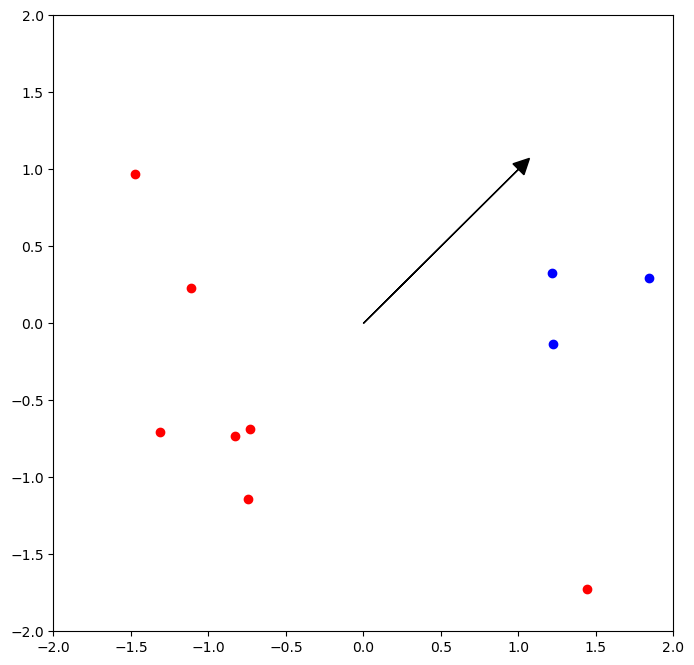

In [10]:
P = np.array([[1, 1]])  # Define a single plane as a vector [1, 1]

fig, ax1 = plt.subplots(figsize=(8, 8))  # Create a plot with specific figure size

plot_vectors([P], axes=[2, 2], ax=ax1)   # Plot the plane P as a vector on the axes

# Plot random points and classify them based on their position relative to the plane
for i in range(0, 10):
    v1 = np.array(np.random.uniform(-2, 2, 2))  # Generate a pair of random numbers between -2 and 2
    side_of_plane = np.sign(np.dot(P, v1.T))    # Determine on which side of the plane the point lies
    
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo')  # Plot blue points if on one side of the plane
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')  # Plot red points if on the other side of the plane

plt.show()  # Display the plot 

The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane. Not intuitive at all!

If we want to plot the separation plane, we need to plot a line that is perpendicular to our vector `P`. We can get such a line using a $90^o$ rotation matrix.

Feel free to change the direction of the plane `P`.

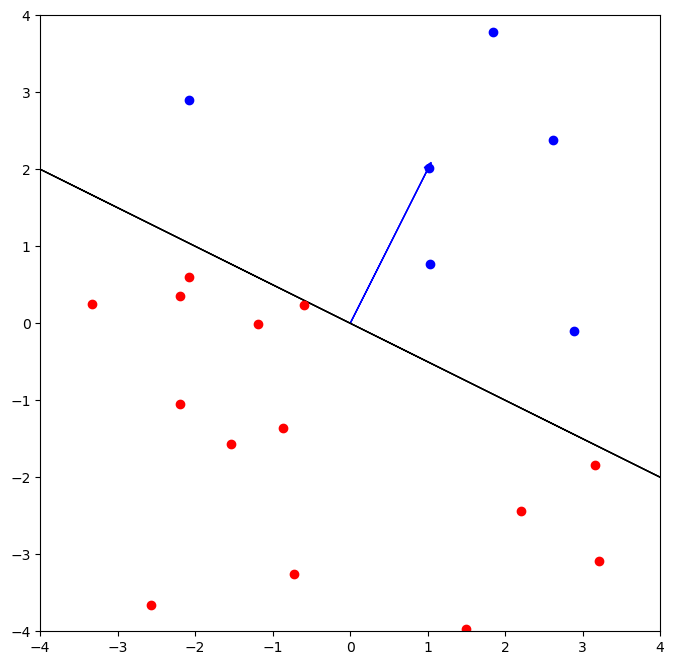

In [12]:
# Define a single plane as a vector [1, 2]. You can change the direction of the vector.
P = np.array([[1, 2]])  

# Get a new plane perpendicular to P using a rotation matrix.
PT = np.dot([[0, 1], [-1, 0]], P.T).T  # Rotate P by 90 degrees to get a perpendicular plane.

# Create a plot with custom size.
fig, ax1 = plt.subplots(figsize=(8, 8))  

# Plot the plane P as a blue vector.
plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1)  

# Plot the perpendicular plane PT as two vectors. 
# The vectors are scaled by 4 to extend them beyond the current box.
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)  # Plot the perpendicular vectors in black.

# Plot 20 random points.
for i in range(0, 20):
    
    v1 = np.array(np.random.uniform(-4, 4, 2))  # Generate a pair of random numbers between -4 and 4.
    side_of_plane = np.sign(np.dot(P, v1.T))  # Determine on which side of the plane the point lies.
    
    # Color the points depending on the sign of the result of np.dot(P, point.T).
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo')  # Plot a blue point if on one side of the plane.
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')  # Plot a red point if on the other side of the plane.

# Display the plot.
plt.show()  

Now, let us see what is inside the code that color the points. 

In [14]:
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

In [15]:
np.dot(P, v1.T)

array([[3]])

In [16]:
np.dot(P, v2.T)

array([[0]])

In [17]:
np.dot(P, v3.T)

array([[-3]])

The function below checks in which side of the plane P is located the vector `v`

In [19]:
def side_of_plane(P, v):
    
    dotproduct = np.dot(P, v.T)                              # Calculate the dot product of P and the transpose of v
    sign_of_dot_product = np.sign(dotproduct)                # Get the sign of each element in the dot product matrix
    sign_of_dot_product_scalar = sign_of_dot_product.item()  # Extract the scalar value from the sign matrix
    
    return sign_of_dot_product_scalar                        # Return the sign as a scalar value (1, -1, or 0)

In [20]:
side_of_plane(P, v1) # In which side is [1, 2]

1

In [21]:
side_of_plane(P, v2) # In which side is [-1, 1]

0

In [22]:
side_of_plane(P, v3) # In which side is [-2, -1]

-1

## Hash Function with multiple planes

In the following section, we are going to define a hash function with a list of three custom planes in 2D.

In [24]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3]        # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])

The next function creates a hash value based on a set of planes. The output value is a combination of the side of the plane where the vector is localized with respect to the collection of planes.

We can think of this list of planes as a set of basic hash functions, each of which can produce only 1 or 0 as output.

In [26]:
def hash_multi_plane(P_l, v):
    
    hash_value = 0                      # Initialize the hash value to zero
    
    for i, P in enumerate(P_l):         # Iterate over the list of planes P_l with their index i
        sign = side_of_plane(P, v)      # Determine the side of the plane where the vector v lies
        hash_i = 1 if sign >= 0 else 0  # Assign 1 if the sign is non-negative, otherwise 0
        hash_value += 2**i * hash_i     # Update the hash value by adding the weighted hash_i
        
    return hash_value                   # Return the final hash value

In [27]:
# Find the number of the plane that containes this value
hash_multi_plane(P_l, v) 

3

## Random Planes

In the cell below, we create a set of three random planes

In [29]:
np.random.seed(0)   # Set the random seed for reproducibility
num_dimensions = 2  # Number of dimensions (set to 300 in the assignment)
num_planes = 3      # Number of planes (set to 10 in the assignment)

# Generate a matrix of random planes using a normal distribution
# The matrix has 'num_planes' rows and 'num_dimensions' columns
random_planes_matrix = np.random.normal(size=(num_planes, num_dimensions))

# Print the generated random planes matrix
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [30]:
v = np.array([[2, 2]])

The next function is similar to the `side_of_plane()` function, but it evaluates more than a plane each time. The result is an array with the side of the plane of `v`, for the set of planes `P`

In [32]:
# Function to determine the side of the plane for a matrix of vectors
def side_of_plane_matrix(P, v):
    
    dotproduct = np.dot(P, v.T)               # Compute the dot product of matrix P and the transpose of matrix v
    sign_of_dot_product = np.sign(dotproduct) # Determine the sign of each element in the dot product matrix
    
    return sign_of_dot_product                # Return the matrix of signs, indicating the side of the plane for each vector

Get the side of the plane of the vector `[2, 2]` for the set of random planes. 

In [34]:
# Calculate the side of the plane for each vector in v using the random_planes_matrix
sides_l = side_of_plane_matrix(random_planes_matrix, v) 

# Print the matrix of signs, where each element indicates the side of the plane for the corresponding vector
print(sides_l)  

[[1.]
 [1.]
 [1.]]


Now, let us use the former function to define our multiplane hash function

In [36]:
def hash_multi_plane_matrix(P, v, num_planes):
    
    sides_matrix = side_of_plane_matrix(P, v)  # Calculate the side of the plane for each vector in v using the matrix P
    hash_value = 0                             # Initialize the hash value to zero
    
    for i in range(num_planes):         # Iterate over the number of planes
        sign = sides_matrix[i].item()   # Extract the scalar value from the matrix cell for the i-th plane
        hash_i = 1 if sign >= 0 else 0  # Assign 1 if the sign is non-negative, otherwise 0
        hash_value += 2**i * hash_i     # Update the hash value by adding 2^i * hash_i
    
    return hash_value   # Return the final computed hash value

Print the bucket hash for the vector `v = [2, 2]`. 

In [38]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

#### Note
This showed you how to make one set of random planes.  You will make multiple sets of random planes in order to make the approximate nearest neighbors more accurate.

## Document vectors

Before we finish this lab, remember that you can represent a document as a vector by adding up the word vectors for the words inside the document. In this example, our embedding contains only three words, each represented by a 3D array.

In [41]:
# Dictionary of word embeddings
word_embedding = {
    "I": np.array([1, 0, 1]),
    "love": np.array([-1, 0, 1]),
    "learning": np.array([1, 0, 1])
}

# List of words in the document
words_in_document = ['I', 'love', 'learning', 'not_a_word']

# Initialize the document embedding as a zero vector
document_embedding = np.array([0, 0, 0])

# Iterate over each word in the document
for word in words_in_document:
    # Add the embedding of the word to the document_embedding
    # If the word is not in word_embedding, use a default value of 0
    document_embedding += word_embedding.get(word, np.array([0, 0, 0]))

# Print the final document embedding
print(document_embedding)

[1 0 3]
